# ***Group 35: Doris Che (33996984)***

# Stage 0: Section 0: TA feedback

My Score: 26.5 / 30

TA suggestions:

Data: Should only use the two datasets for Athens. Also, a new binary variable should be created to indicate whether a listing is from weekdays or from weekends.

Pre-selection of variables: Do we still need room_shared and room_private when having room_type?

Scientific Question: The scientific question should be revised. The current one is not clear.  

Scientific Question: The word "effects" can be misleading. Association vs causation. We usually can't use observational data to make causal inference.

Scientific Question: Your question should consider as many input variables as possible. 

# Stage 1: Data Description & Exploratory Data Analysis

## Section 1: Data Description

### 1. Provide a descriptive summary

#### a) This data is about Airbnb prices in the European cities. There are 10 European cities in total, and each city has its own weekday and weekend subsets. Each subset contains 19 columns, and all subsets share the same variable names (column headers). The 10 cities are Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna.
- the number of observations:51707
- the number of variables:19

<span style="color:red"> *However, for the purpose of this study, we will only focus on using Athens' weekday and weekend Airbnb price data set.*</span>

| Variable Name  | Description | Type |
|--------|-----|----------------|
| realSum | The total price of rooms for two people and two nights (EUR) | Numerical |
| room_type  | The type of rooms (Private room/ Entire home apt/ Shared room)  |  Categorical  |
| room_shared   | whether the room is shared | Binary|
| room_private  | whether the room is private | Binary|
| room_capacity | Maximum number of guests | Integer |
| host_is_superhost  | whether the host is good (True/False)| Binary|
| multi   | whether the host has 2 to 4 listings | Binary |
| biz | whether the host has more than 4 listings | Binary|
| cleanliness_rating | rating for the cleaness of the rooms | Numerical|
|guest_satisfaction_overall| overall satisfaction for guests| Numerical|
| bedrooms  | numbers of bedrooms (0=studios)| Integer|
|dist| Distance from the city centre (km) | Numerical|
| metro_dist  | distance to the closest metro station (km) |Numerical|
| attr_index  | attraction index of the listing’s location| Numerical|
| attr_index_norm | normalized attraction index of the listing’s location |Numerical|
| rest_index | restaurant index of the listing’s location|Numerical|
| rest_index_norm| normalized restaurant index of the listing’s location |Numerical|
| lng | longitude coordinate of the listing |Numerical|
| lat | latitude coordinate of the listing |Numerical|


Variables Description Reference : https://zenodo.org/records/4446043#.Y9Y9ENJBwUE

#### b) We don't know how the data has been collected, but this data was published by Zenodo and has no copyright. The Doi of this data is https://doi.org/10.5281/zenodo.4446043. Citation will be : Gyódi, K., & Nawaro, Ł. (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach (Supplementary Material) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4446043.

#### c) All variables are realSum, room_type,room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist,metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat.

| Dropped Variables | Reason |
|--------|-----|
|attr_index| There is a normalized version of this variable that is attr_index_norm, so I will drop this variable. |
|rest_index| There is a normalized version of this variable that is attr_index_norm, so I will drop this variable.|
|lng| Such variable will only show the longitude, which won't contribute meaningfully to the model. |
|lat| Such variable will only show the latitude, which won't contribute meaningfully to the model. |
|<span style="color:red"> *room_shared*</span>| <span style="color:red">*We already having room_type variable so we drop room_shared to avoid multicollinearity.*</span>|
|<span style="color:red"> *room_private*</span>| <span style="color:red">*We already having room_type variable so we drop room_private to avoid multicollinearity.*</span>|

## Section 2: Scientific Question

#### a) <span style="color:red"> *We want to examine the association between the rental price of an Airbnb listing (response) and predictors related to listing characteristics (e.g., room type, capacity, cleanliness rating, whether the listing occurs on a weekday or a weekend) and location factors (e.g., distance to the closest metro station and restaurant index of the listing’s location).*</span>

#### b) My response variable will be realSum.

#### c)<span style="color:red"> *This question will be focusing on inference because I will want to find the relationship between realSum, room type, capacity, cleanliness rating, distance to the closest metro station, whether the listing occurs on a weekday or a weekend, and restaurant index of the listing’s location.*</span>

## Section 3: Exploratory Data Analysis and Visualization (no more than one plot per student)

#### a) Provide your reproducible code for

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
athens_weekday_df <- read.csv("data/athens_weekdays.csv") %>% 
    mutate (is_weekend = 0) %>%
    select(realSum, room_type, person_capacity, cleanliness_rating, metro_dist, rest_index_norm,is_weekend)

athens_weekend_df <- read.csv("data/athens_weekends.csv") %>% 
    mutate (is_weekend = 1)%>% 
    select(realSum, room_type, person_capacity, cleanliness_rating, metro_dist, rest_index_norm,is_weekend)

athens_df<-rbind(athens_weekday_df,athens_weekend_df)
head(athens_df)

,realSum,room_type,person_capacity,cleanliness_rating,metro_dist,rest_index_norm,is_weekend
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,129.82448,Entire home/apt,4,10,0.8818900,5.915160,0
2,138.96375,Entire home/apt,4,10,0.3045679,30.572629,0
3,156.30492,Entire home/apt,3,10,0.2884881,29.731642,0
4,91.62702,Entire home/apt,4,10,0.2974673,4.408047,0
5,74.05151,Private room,2,10,0.3852657,8.509204,0
6,113.88934,Entire home/apt,6,10,0.4538674,11.911981,0


#### b) Provide a visualization that you consider relevant to address your question or to explore the data.

`geom_smooth()` using formula = 'y ~ x'


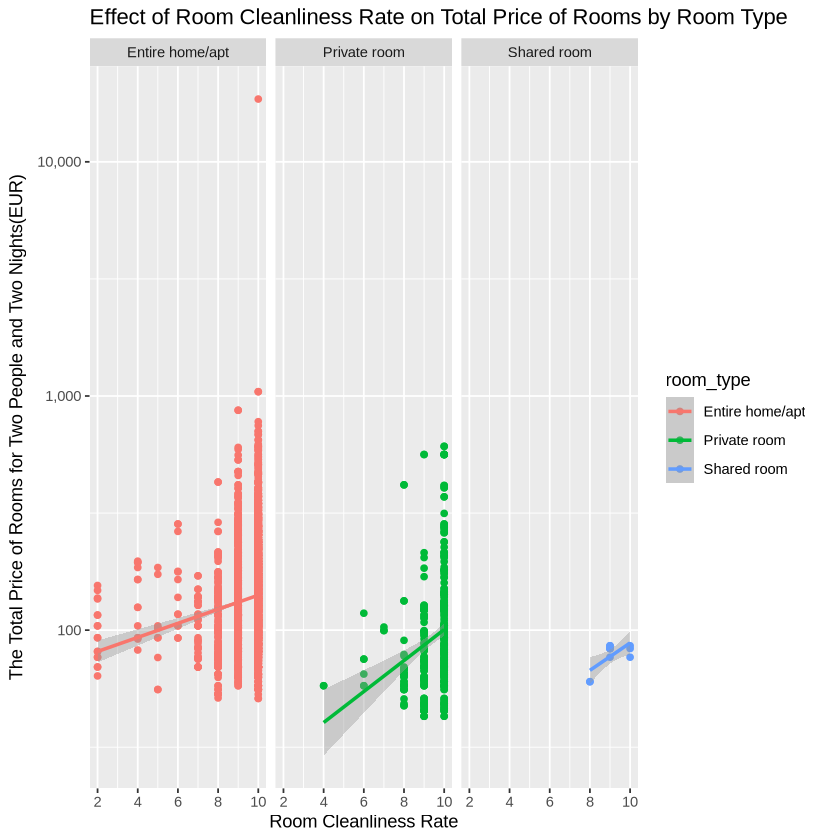

In [3]:
plot <- ggplot(athens_df, aes(x=cleanliness_rating, y=realSum, color=room_type))+
geom_point()+
geom_smooth(method="lm")+
scale_y_log10(labels = scales::comma)+
facet_wrap(~ room_type) +
ggtitle("Effect of Room Cleanliness Rate on Total Price of Rooms by Room Type")+
xlab("Room Cleanliness Rate")+
ylab("The Total Price of Rooms for Two People and Two Nights(EUR)")
plot

#### c) Provide the following Interpretations (max 2-3 sentences for each point below)

#### - Explain why you consider this plot relevant to address your question or to explore the data.
##### The above plot not only shows the rating of each room, but it also clearly shows the relationship between the room cleanliness rate and the total price of rooms by room type by using a linear regression line.

#### - Interpret briefly the results obtained.
##### The regression line shows that there is a negative relationship between the cleanliness rate and the total price for the Entire home/apt. There is also an upward relationship between the cleanliness rate and the total price of a private room. For shared room, the relationship is almost flat with a slightly upward trend.

#### - What do you learn from your visualization?
##### I learned that Entire homes/apartments are the most expensive, followed by private rooms, and then shared rooms, which have the lowest price. People renting an entire unit care less about the cleanliness ratings and price, whereas those choosing private or shared rooms tend to prioritize higher cleanliness rankings and are willing to pay more for them.

# Stage 2: Method, Plan, Computation Code and Output

## Section 4: Method and Plan

We will be using the multiple linear regression model to examine the association between the rental price of an Airbnb listing and the selected features (room_type, person_capacity, cleanliness_rating, metro_dist, rest_index_norm, and is_weekend).

1. The multiple linear regression model is appropriate because it examines the relationship between a continuous response (realSum) and several explanatory variables at the same time, and it provides interpretable coefficients that help us understand how each variable is associated with rental price while controlling for the others.
2. To apply the multiple linear regression model, we assume that the relationship between the response and each explanatory variable is approximately linear and that there is not severe multicollinearity among the explanatory variables.
3. The multiple linear regression model is limited because it can only capture linear relationships, so that any nonlinear patterns in the data may be missed or considered as noise, which can reduce our model performance.

## Section 5: Computational Code and Output

In [4]:
library(broom)

In [5]:
mlr_model <- lm(realSum ~ room_type + person_capacity + cleanliness_rating + metro_dist + rest_index_norm + is_weekend, data = athens_df)

In [6]:
table <- tidy(mlr_model)
table

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-47.214694,44.3807935,-1.0638542,2.874435e-01
room_typePrivate room,-18.406490,14.1991773,-1.2963068,1.949265e-01
room_typeShared room,-66.803770,79.4938961,-0.8403635,4.007427e-01
person_capacity,16.641194,2.9201836,5.6986807,1.272893e-08
cleanliness_rating,9.363001,4.3242323,2.1652401,3.041402e-02
metro_dist,-18.001669,13.1366233,-1.3703422,1.706385e-01
rest_index_norm,3.684632,0.4412249,8.3509146,8.569201e-17
is_weekend,41.474360,9.3254273,4.4474487,8.868223e-06


The results indicate that person capacity, cleanliness rating, restaurant index, and whether the listing occurs on a weekend all have positive associations with Airbnb rental price, and they are all statistically significant, which aligns with our expectation that higher values of these features will cause the Airbnb price to increase. Most importantly, we find that weekend pricing is much higher than weekday pricing, and the reason behind this could be that weekend demand on Airbnb is higher, and therefore the prices are higher, which matches our expectation. Lastly, we find that room type and metro distance have negative associations with Airbnb price, and these two variables are not statistically significant in this model.